<p>Document rédigé par BOUNGOTO BIBAYI Yoanne</br></p>

# <u>Data Preprocessing:</u>


<p>C'est l'une des étapes les plus importantes pour dévélopper des modules avec le plus de performances.</p></br>

<p><strong><font color="blue">Les algorithmes</font></strong> de machine learning apprennent à partir des données qui leur sont fournies, si ces données sont de mauvaises qualités, quelles sont erronées, incomplètes, redondantes alors l'algoritme qui en resulte sera assez mauvais, puisqu'il est censé refléter ce qu'il y'a dans les données.
c'est pour cette raison qu'il est impératif de <strong>préparer</strong> les données avant leur passage dans la machine, il faut les <strong>nettoyer</strong>, les <strong>filtrer</strong>, les <strong>normaliser</strong> et c'est cette étape que l'on appelle le <strong>Preprocessing</strong></br></p>

Parmi les opérations de Preprocessing les plus importantes il y'a:</br>
 <ul>
    <li>Encodage</li>
    <li>Normalisation</li>
    <li>Imputation</li>
    <li>Selection</li>
    <li>Extraction</li>
</ul>

<p>Dans ce tutoriel nous ne verrons que la technique d'encodage et de Normalisation. on n'abordera le reste dans un autre tutoriel.</p>


## <u>Encodage</u>


<p>Pour faire des calcules une machine à besoin des valeurs numériques. Si notre dataset contient des valeurs qualitatives sous forme de mots, il est indispensable de convertir ces mots en valeurs numériques (Quantitatives).
Il existe 2 types d'encodages:
<ul>
    <li><strong>Encodage Ordinal</strong></li> --> <font color="gren">Label Encoder</font>: Associe chaque catégorie à une valeur décimale unique (pour un tableau contenant une seul variable y)

 $$\left(\begin{array}{}chat\\chien\\Oiseau\end{array}\right) --> \left(\begin{array}{}1\\2\\0\end{array}\right)$$
    

--> <font color="blue">Ordinal Encoder</font>: Pour un tableau qui contient plusieurs variables x

 $$\left(\begin{array}{}chat & Poils\\chien & poils \\Oiseau & Plumes\end{array}\right)-->\left(\begin{array}{}1 & 1\\2 & 1\\0 & 0\end{array}\right)$$
    

  <li><strong>Encodage One-Hot</strong></li>
   LabelBinarizer(), MultiLabelBinarizer, OneHotEncoder().</br>
   
   Ensemble nous allons juste voir LabelBinarizer() et OneHotEncoder()

 $$\left(\begin{array}{}Chat\\Chat\\Chien\\Oiseau\end{array}\right) --> \left(\begin{array}{}1 & 0 & 0 \\ 1 & 0 & 0 \\ 0 & 1 & 0 \\0 & 0 & 1\end{array}\right)$$

La lecture est differente contrairement aux autres matrices dont l'identification se faisaient en ligne. Ici la classe est representée de façon binaire dans une colonne qui lui est propre. ex: chat pour colonne 1, chien colonne 2 et Oiseau colonne 3.
La colonne sera la même pour les classes identiques(exemple:chat).

Autant de colonne seront créees pour le même nombre de variable ainsi les algorithmes ne pourront plus comparer chat, chien et oiseau sur un même axe car ces catégories sont desormais séparer en plusieurs dimensions
</ul>
</p>

### <u>Discussion:</u>


<p>En ce qui concerne <Strong>l'encodage Ordinal</strong> d'un point de vu arithmétique ça reviendrai à dire 0<1<2 --> Oiseau< Chat <Chien ça n'a pas de sens. car ces catégories n'ont rien d'ordinaire. On risque de pénaliser la plus part des modèles machine learning à l'exception des arbres de décisions qui eux ne sont pas sensibles au rélation d'ordre. Pour éviter cela <STRONG>l'encodage One Hot</STRONG> est la solution (Car ils seront séparés sur plusieurs axes et donc ne pourront avoir aucune comparaison arithmétique possible).</p>

## <u>Encodage</strong></u>

### <u>LabelEncoder</u>

In [1]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [2]:
y=np.array(['chat','chien','chat','Oiseau'])

In [3]:
encoder=LabelEncoder()
encoder.fit_transform(y)

array([1, 2, 1, 0], dtype=int64)

In [4]:
encoder.inverse_transform(np.array([0, 0, 2, 2]))

array(['Oiseau', 'Oiseau', 'chien', 'chien'], dtype='<U6')

#### <u>Interprétation:</u>


<p>On crée notre tableau y avec les données chat, chien et Oiseau
On crée un objet de la classe LabelEncoder() --> encoder=LabelEncoder
Puis on entraîne avec la méthodes transform_fit toutes les données contenues dans notre variable y qu'on lui a fournit.</p>


<p>La méthode inverse_transform permet de décoder les données.
Par exemple, Si on entraîne un modèle de machine learning à identifier des animeaux, ce modèle nous donnera les valeurs numérique 0, 1 ou 2 et que nous voulons savoir à quoi correspond chaque numéro, on pourra utiliser cette méthode.</p>

### <u>OrdinalEncoder</u>

In [5]:
from sklearn.preprocessing import OrdinalEncoder

In [6]:
x=np.array([['chat', 'poilu'],
            ['chien', 'poils'], 
            ['poule', 'Plumes'],
            ['ourse', 'poilu']])

In [7]:
encoder=OrdinalEncoder()
encoder.fit_transform(x)

array([[0., 2.],
       [1., 1.],
       [3., 0.],
       [2., 2.]])

## Encodage One-Hot

### <u>LabelBinarizer</u>

In [8]:
from sklearn.preprocessing import LabelBinarizer

In [9]:
y=np.array(['Paris', 'Marseille', 'Lyon', 'Bordeaux', 'Toulouse', 'Lille'])

In [10]:
encoder=LabelBinarizer()
encoder.fit_transform(y)

array([[0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0]])

#### <u>Interpretation:</u>

 
 <p>Vous saurez maintenant l'interpréter car nous l'avons déjà fait précédemment. Mais concentrons nous sur le résultat de notre matrice. Dans le cas ou on aura un grand nombre de catégories, dans un fichier immobilier par exemple avec un très grand nombre de villes, alors le resultat va nous donner un tableau extrêmement large. On pourrait aussi penser que ça occuperait une très grande mémoire de notre ordinateur, mais il n'en est rien, car en observant bien la matrice vous verrez quelle est essentiellement composée de zero, nous somme devant une matrice creuse, l'ordinateur ne stockera que la valeur 1.</br></p>

   <p>Ainsi ne pas voir s'afficher un grand tableau, on a l'option de choisir si notre matrice doit être compressée ou non. Pour cela on mettra dans la classe LabelBinarizer(), <font color="green"><strong>sparse_output=True</strong></font> et dans le résultat vous n'aurez plus la matrice mais le resultat :Compressed Sparse Row format.</p>

In [11]:
encoder=LabelBinarizer(sparse_output=True)
encoder.fit_transform(y)

<6x6 sparse matrix of type '<class 'numpy.int32'>'
	with 6 stored elements in Compressed Sparse Row format>

### <u>OneHotEncoder</u>

In [12]:
from sklearn.preprocessing import OneHotEncoder

In [13]:
y=np.array([['Paris', 'Marseille'], 
            ['Lyon', 'Bordeaux'],
            ['Toulouse', 'Lille']])

In [14]:
encoder=OneHotEncoder()

In [15]:
encoder.fit_transform(y)

<3x6 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

#### <u>Observation:</u>


<P>Vous avez remarqué que pour le résultat du transformer OneHotEncoder la compression est incluse par défaut.</P>

## Normalisation


<P>En data science il est indispensable de normaliser nos données <mark>quantitatives</mark>, c'est à dire les mettre toutes sur une même echelle, cela facilite l'apprentissage de nos modèles machine learning qui sont basés sur les calcules de variances, la descente de gradient, les calcules de distances. il existe beaucoup de techniques de normalisation, nous allons voir les 2 plus connues à savoir:
La normalisation MinMax
La standardisation.</P>


### <u>NormalisationMinMax</u>


Transforme chaque variable X de telle sorte à être comprise entre 0 et 1.


$$X_{scaled}=\frac{{X}-{X}_{min}}{X_{max}-X_{min}}.$$

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
X=np.array([[70],
           [80],
           [120]])

In [18]:
scaler=MinMaxScaler()
scaler.fit_transform(X)

array([[0. ],
       [0.2],
       [1. ]])

#### <u>Discussion:</u>


<P>La normalisationMinMax transforme chaque variable X de telle sorte à être comprise entre 0 et 1.
Vous pourriez vos dire que si on deforme nos données, ça ne veut plus rien dire, notre modèle ne va rien comprendre, ou perdra de l'information sur nos véritables données. En réalité non, on ne perd aucune information car les normalisations ont conservé les rapports de distances qu'ils y 'avaient dans nos données, c'est à dire l'écart qu'il y'a entre 0 et 0.2 est égale à l'écart entre 70 et 80et ainsi de suite.</P>


<p>A présent prenant une valeur test quelconque 90.</P>

In [19]:
x_test= np.array([[90]])

In [20]:
scaler.transform(x_test)

array([[0.4]])


<p>Notre transformer(lire en anglais), entraîné avec les données train a bien fonctionnée, elle a juste inserée la donnée x=90, dans la fonction créee avec les données train (70,80,120).</p>


<p>Pour bien visualiser l'effet de la nomrmalisation MinMax nous allons charger le dataset des fleurs d'iris.</p>

In [21]:
from sklearn import datasets
import matplotlib.pyplot as plt

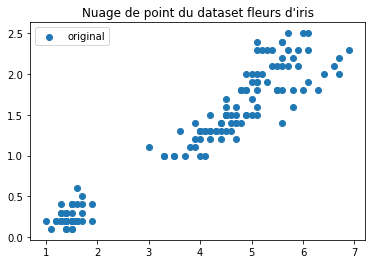

In [22]:
iris=datasets.load_iris()
x=iris.data
plt.scatter(x[:,2], x[:,3], label="original")
plt.title("Nuage de point du dataset fleurs d'iris")
plt.legend()
plt.show()

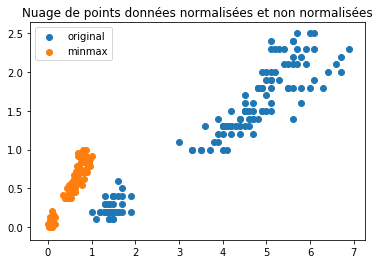

In [23]:
X_minmax = MinMaxScaler()
X_minmax=MinMaxScaler().fit_transform(x)
plt.scatter(x[:,2], x[:,3], label="original")
plt.scatter(X_minmax[:,2], X_minmax[:,3], label="minmax")
plt.title("Nuage de points données normalisées et non normalisées")
plt.legend()
plt.show()

#### <u>Observation:</u>


<p>Nous pouvons voir que nos données normaliser avec minmax sont bien comprises entre 0 et 1 (données en orange) et ces mêmes données non normalisées vont au-délà de 1.</p>

## Standardisation


<p>Cette technique transforme nos données de telle sorte à ce que chaque variable est une moyenne est nulle et un écart-type égale à 1.
Pour ça il faut soustraire de chaque valeur la moyenne de l'ensemble de données initiale et diviser le tout de l'écart-type de ces même données.
On obtient ainsi des données très simple à utiliser pour la plus part des modèles statistiques.</p>

$$X_{scale}=\frac{X-µ_{x}}{\sigma}$$

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
x_scale=np.array([[70], 
                  [80],
                  [120]])

In [26]:
scaler=StandardScaler()
scaler.fit_transform(x_scale)

array([[-0.9258201 ],
       [-0.46291005],
       [ 1.38873015]])

#### <u>Observation:</u>


<p>Cette technique est très utilisée, mais néanmoins elle est sensible aux valeurs aberrantes (Outliers) qui pourraient être contenues dans nos données. cela rendra nos modèles très difficiles à exploités.
Dans cette situation il faudra utiliser un transformateur très peu sensible aux Outliers qui est le <strong><font color="green">RobustScaler</strong></font> que nous verrons très prochainement.</p>

# Conclusion:

 
<p>Le preprocessing est important pour améliorer la qualité de nos données avant leur passage dans la machine. Pour ça sklearn ont développé un objet appelé transformer. Son rôle est de transformer nos données de façon cohérente, en appliquant sur les données du testset la même fonction de transformation qui a servie à traiter les données du trainset.
Pour ça, les transformers disposent d'une méthode fit(X_train) et d'une méthode transform(X_test) qui peut être reuni en fit_transform().</br></p>

En un mot pour résumer ce que nous avons vu, on pourrait dire: 

<i><font color="blue">On encode les variables qualitatives et on Normalise les variables quantitatives</i></font>.</p>

Pour plus d'analyses aller sur ma page https://github.com/BOUNGOTO/Travaux_Machine_learning